LINEAR REG

# FATIMA AI-304

In [4]:
import zipfile
import os

# Path to the ZIP file
zip_file_path = "archive.zip"

# Extract files to the current directory
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    for file in zip_ref.namelist():
        # Avoid creating subdirectories by extracting files directly
        if not os.path.basename(file):  # Skip directories
            continue
        with open(os.path.basename(file), "wb") as output_file:
            output_file.write(zip_ref.read(file))

print("Files extracted without creating directories.")


Files extracted without creating directories.


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [8]:
df=pd.read_csv("Student_Marks.csv")
df.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [10]:
df.shape

(100, 3)

In [12]:
df.columns

Index(['number_courses', 'time_study', 'Marks'], dtype='object')

In [14]:
df.info

<bound method DataFrame.info of     number_courses  time_study   Marks
0                3       4.508  19.202
1                4       0.096   7.734
2                4       3.133  13.811
3                6       7.909  53.018
4                8       7.811  55.299
..             ...         ...     ...
95               6       3.561  19.128
96               3       0.301   5.609
97               4       7.163  41.444
98               7       0.309  12.027
99               3       6.335  32.357

[100 rows x 3 columns]>

In [16]:
df.isna()

,number_courses,time_study,Marks
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
95,False,False,False
96,False,False,False
97,False,False,False
98,False,False,False


In [18]:
df.isna().sum()

number_courses    0
time_study        0
Marks             0
dtype: int64

In [20]:
df.describe

<bound method NDFrame.describe of     number_courses  time_study   Marks
0                3       4.508  19.202
1                4       0.096   7.734
2                4       3.133  13.811
3                6       7.909  53.018
4                8       7.811  55.299
..             ...         ...     ...
95               6       3.561  19.128
96               3       0.301   5.609
97               4       7.163  41.444
98               7       0.309  12.027
99               3       6.335  32.357

[100 rows x 3 columns]>

In [24]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [26]:
X

,number_courses,time_study
0,3,4.508
1,4,0.096
2,4,3.133
3,6,7.909
4,8,7.811
...,...,...
95,6,3.561
96,3,0.301
97,4,7.163
98,7,0.309


In [28]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [30]:
X_train.shape

(70, 2)

In [32]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [34]:
print("b=",regressor.coef_)
print("a =",regressor.intercept_)

b= [1.8026446  5.30599863]
a = -6.481888794697401


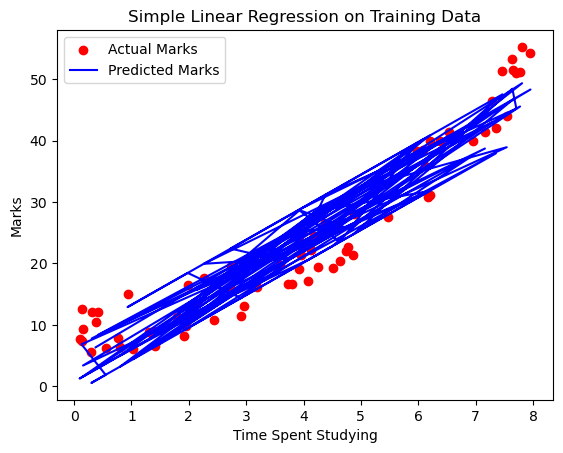

In [36]:
import matplotlib.pyplot as plt

# Assuming you have split your dataset into training data: X_train, y_train
# and you have a trained regressor (e.g., LinearRegression model)

# Visualize the relationship for one feature, e.g., 'time_study' vs 'Marks'
plt.scatter(X_train['time_study'], y_train, color='red', label="Actual Marks")  # Scatter plot for training data
plt.plot(X_train['time_study'], regressor.predict(X_train), color='blue', label="Predicted Marks")  # Regression line

# Add titles and labels
plt.title("Simple Linear Regression on Training Data")
plt.xlabel("Time Spent Studying")
plt.ylabel("Marks")
plt.legend()
plt.show()


In [38]:
y_pred = regressor.predict(X_test)

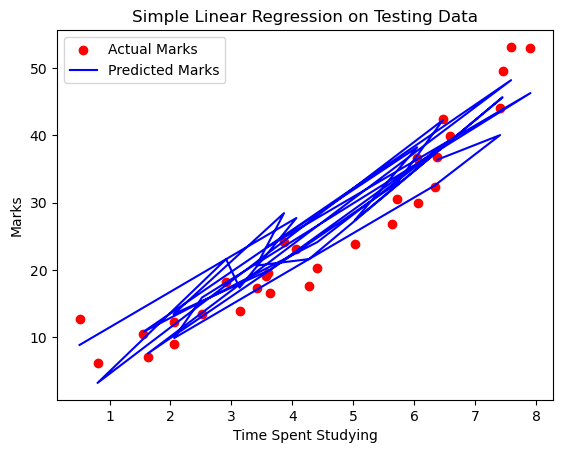

In [40]:
import matplotlib.pyplot as plt

# Visualizing the testing dataset
plt.scatter(X_test['time_study'], y_test, color='red', label="Actual Marks")  # Scatter plot for test data
plt.plot(X_test['time_study'], y_pred, color='blue', label="Predicted Marks")  # Regression line

# Add titles and labels
plt.title("Simple Linear Regression on Testing Data")
plt.xlabel("Time Spent Studying")
plt.ylabel("Marks")
plt.legend()
plt.show()


In [42]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 2.7385522781413347
MSE: 10.255069586126703
RMSE: 3.2023537571802874
